### Descriptives Dataset
First, we will show some descriptives of the ground truth. Then we will dive deeper into the predictions of ChatGPT.

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import spacy
import nltk

Fig 1. First, a plot of the distribution of the classes.


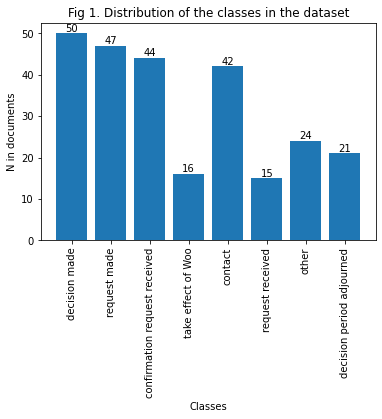

In [3]:
dataset = pd.read_csv("data/GT/GTtest/date_event_combinations.csv")
all_classes = Counter(list(dataset['class'].values))

xaxis = ['decision made', 'request made', 'confirmation request received', 'take effect of Woo', 'contact','request received',  'other', 'decision period adjourned']

plt.bar(xaxis, all_classes.values())

# Set labels and title
plt.xlabel('Classes')
plt.ylabel('N in documents')
plt.title('Fig 1. Distribution of the classes in the dataset')
plt.xticks(rotation='vertical')

for i, v in enumerate(all_classes.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the plot
print(f"Fig 1. First, a plot of the distribution of the classes.")
plt.show()


Second, a plot of the distribution of the length of the sentences.


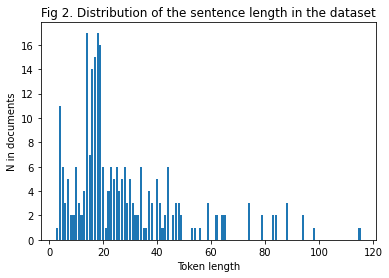

In [4]:
def get_token_length(text):
    tokens = text.split()
    return len(tokens)

dataset['Token Length'] = dataset['sentence'].apply(get_token_length)
all_sentences = Counter(list(dataset['Token Length'].values))
plt.bar(all_sentences.keys(), all_sentences.values())

# Set labels and title
plt.xlabel('Token length')
plt.ylabel('N in documents')
plt.title('Fig 2. Distribution of the sentence length in the dataset')

# Display the plot
print(f"Second, a plot of the distribution of the length of the sentences.")
plt.show()

193


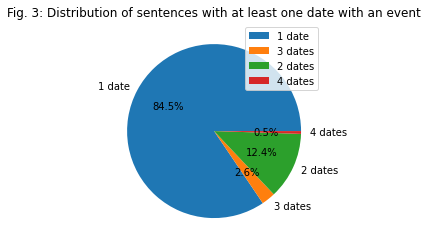

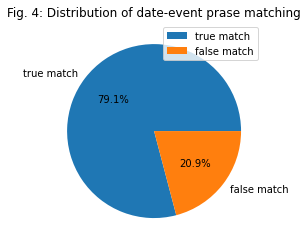

In [5]:
predictions = pd.read_csv("data/results/chatgpt_extraction/evaluated_predictions.csv")
results = []
for i in list(set(predictions['doc_id'].values)):
    df_doc = predictions.loc[predictions['doc_id']==i]
    df_true = df_doc.loc[df_doc['truth']==True]
    sentences = set(df_true['sentence'].values)
    for sent in sentences:
        results.append(len(df_doc.loc[df_doc['sentence']==sent]))



results = dict(Counter(results))
print(sum(list(results.values())) )
# no_date_sentences = len(set(predictions['sentence'].values)) - sum(list(results.values())) 
# results[0] = no_date_sentences

labels = ['1 date', '3 dates', '2 dates', '4 dates']
values = list(results.values())

# Plot the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Fig. 3: Distribution of sentences with at least one date with an event')
plt.legend()
# Display the chart
plt.show()

labels = ['true match', 'false match']
values = [53, 14]

# Plot the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Fig. 4: Distribution of date-event prase matching')
plt.legend()
# Display the chart
plt.show()




### Descriptives prediction ChatGPT

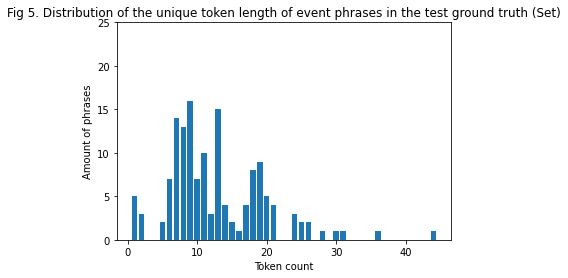

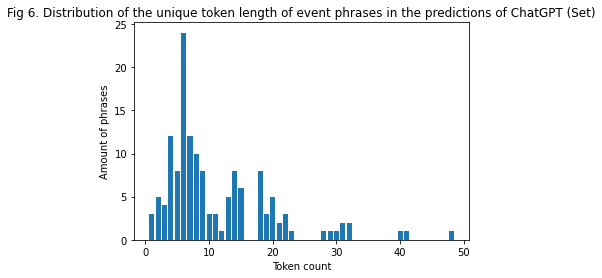

In [7]:
# df_test = pd.read_csv("code/data/GT/GTtest/date_event_combinations.csv")
# df_test = df_test.loc[df_test['class'] != 'besluit datum']
# nltk.download('punkt')

df_test = pd.read_csv("data/results/chatgpt_extraction/evaluated_predictions_event.csv")

def tokenize_string(string):
    tokens = nltk.word_tokenize(string)
    return tokens

string_list = list(df_test['truth_event'].values)

# Create a set of tokens
tokens_list = []
for string in string_list:
    tokens = tokenize_string(string)

    tokens_list.append(set(tokens))


len_events = [len(i) for i in tokens_list]
from collections import Counter

event_dis = Counter(len_events)

keys = list(event_dis.keys())
values = list(event_dis.values())

# Plot the histogram
plt.bar(keys, values)

# Set labels and title
plt.xlabel('Token count')
plt.ylabel('Amount of phrases')
plt.title('Fig 5. Distribution of the unique token length of event phrases in the test ground truth (Set)')

plt.yticks([0,5,10,15,20,25])

# Display the plot
plt.show()

df_jaccard = pd.read_csv("data/results/chatgpt_extraction/evaluated_predictions_event.csv")
# df_jaccard = df_jaccard.loc[df_jaccard['truth']==True]

string_list = list(df_jaccard['prediction_event'].values)

# Create a set of tokens
tokens_list = []
for string in string_list:
    tokens = tokenize_string(string)
    tokens_list.append(set(tokens))


len_events = [len(i) for i in tokens_list]
from collections import Counter

event_dis = Counter(len_events)

keys = list(event_dis.keys())
values = list(event_dis.values())

# Plot the histogram
plt.bar(keys, values)

# Set labels and title
plt.xlabel('Token count')
plt.ylabel('Amount of phrases')
plt.title('Fig 6. Distribution of the unique token length of event phrases in the predictions of ChatGPT (Set)')

# Display the plot
plt.show()




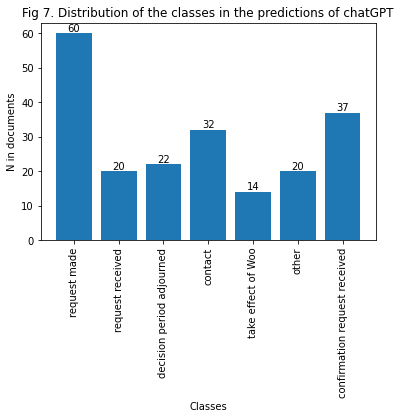

In [8]:
dataset = pd.read_csv('data/results/chatgpt_classification/predictions.csv')
results = dict(Counter(list(dataset['prediction'].values)))

xaxis = ['request made', 'request received', 'decision period adjourned', 'contact', 'take effect of Woo', 'other', 'confirmation request received']
plt.bar(xaxis, results.values())

# Set labels and title
plt.xlabel('Classes')
plt.ylabel('N in documents')
plt.title('Fig 7. Distribution of the classes in the predictions of chatGPT')
plt.xticks(rotation='vertical')

for i, v in enumerate(results.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the plot
plt.show()